In [295]:
import os
os.environ["KAGGLEHUB_CACHE"] = "/Users/MacBook/Desktop/Student_Habits_Academic_Performance" # set dataset directory
import seaborn as sb
import matplotlib.pyplot as plot
%matplotlib inline
import kagglehub as kaggle
import pandas as pd
from scipy.stats import spearmanr
import statsmodels.api as sm
from stargazer.stargazer import Stargazer as sg
from IPython.display import HTML

## Imports

This cell imports the required libraries for data loading, visualization, statistical testing, and regression modeling:

- `os` and `kagglehub` to download and access the dataset.
- `pandas`, `seaborn`, `matplotlib` for data manipulation and visualization.
- `spearmanr` for non-parametric correlation analysis.
- `statsmodels` and `stargazer` for regression modeling and presentation.
- `html` for displaying the `stargazer` model

In [296]:
path = kaggle.dataset_download("jayaantanaath/student-habits-vs-academic-performance")


df = pd.read_csv("/Users/MacBook/Desktop/Student_Habits_Academic_Performance/datasets/jayaantanaath/student-habits-vs-academic-performance/versions/1/student_habits_performance.csv")

## Download and Load Data

This step uses `kagglehub` to download the dataset and load it into a pandas DataFrame. The dataset contains information about student habits and their academic performance, which we will use for our analysis.

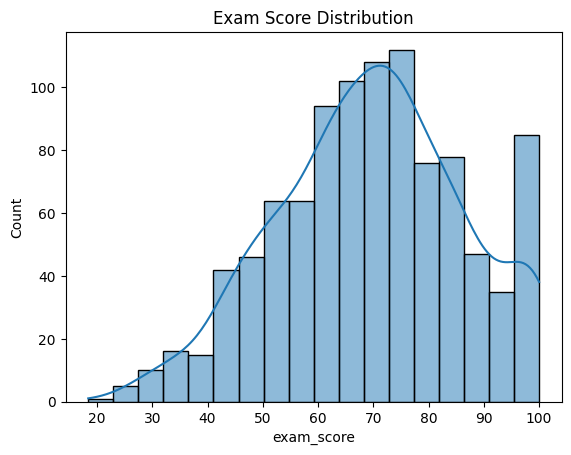

In [297]:
sb.histplot(df["exam_score"], kde=True)
plot.title("Exam Score Distribution")
plot.show()

## Initial Distribution of Exam Score

We begin by exploring the distribution of the dependent variable, `exam_score`. The histogram reveals the overall shape of the distribution and helps identify potential outliers at the high end.

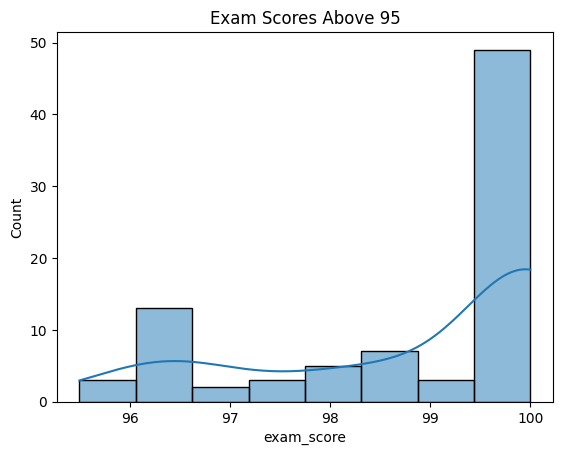

In [298]:
sb.histplot(df[df["exam_score"] > 95]["exam_score"], kde=True)
plot.title("Exam Scores Above 95")
plot.show()

## Explore High-End Outliers

To verify and visualize the presence of high-end outliers, we zoom in on exam scores above 95. A noticeable spike near 100 indicates potential outliers that could skew the analysis.

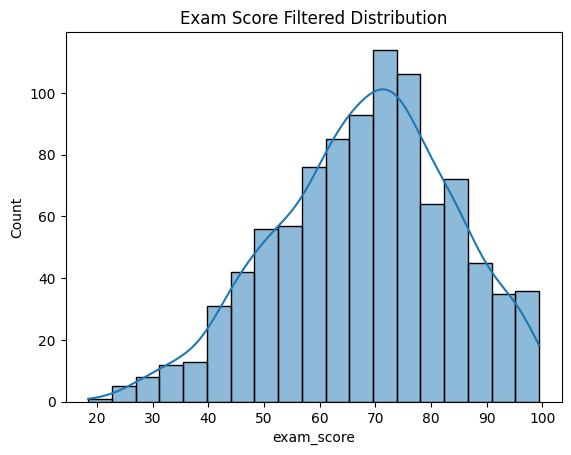

In [299]:
df_filtered = df[df["exam_score"] < 99.5].copy()

sb.histplot(df_filtered["exam_score"], kde=True)
plot.title("Exam Score Filtered Distribution")
plot.show()

## Filter Outliers and Re-examine Distribution

We remove observations with `exam_score >= 99.5` to reduce skew. Re-plotting the distribution confirms a more normal shape, which is more appropriate for correlation and regression analysis.

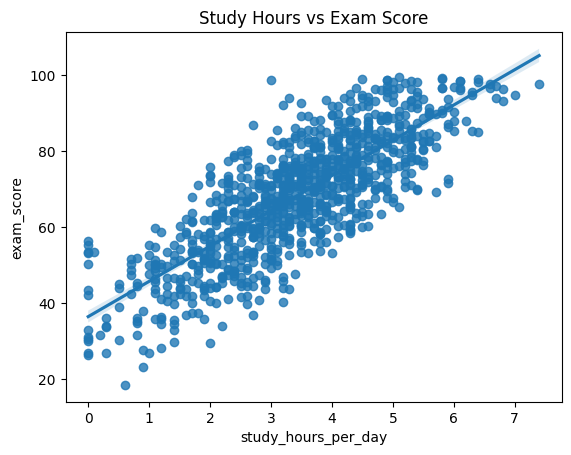

rho = 0.78, p = 0.00


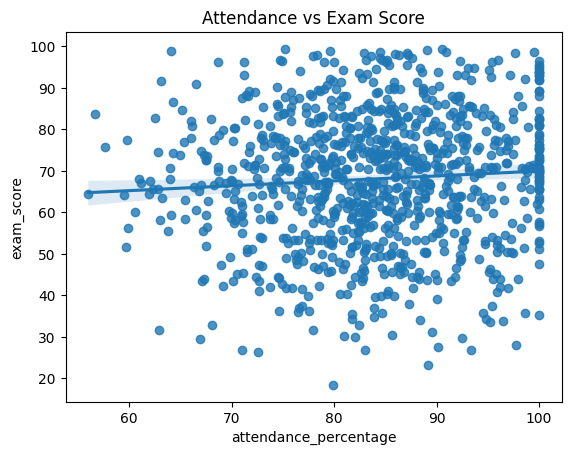

rho = 0.08, p = 0.02


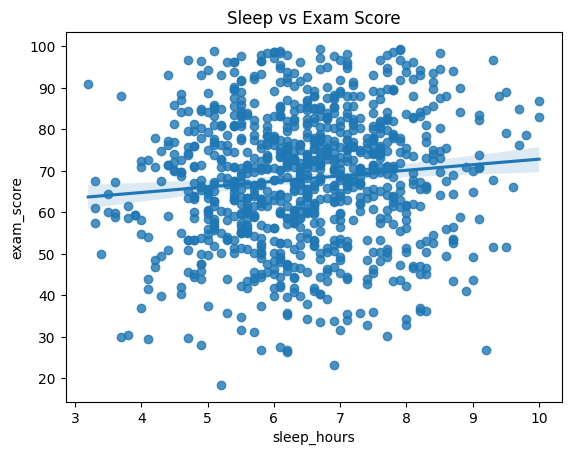

rho = 0.11, p = 0.00


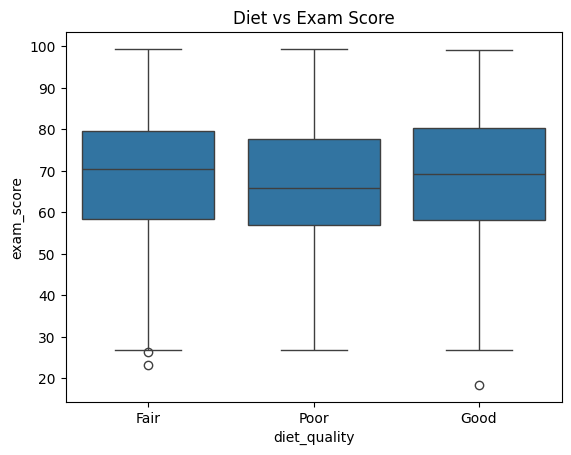

rho = -0.05, p = 0.10


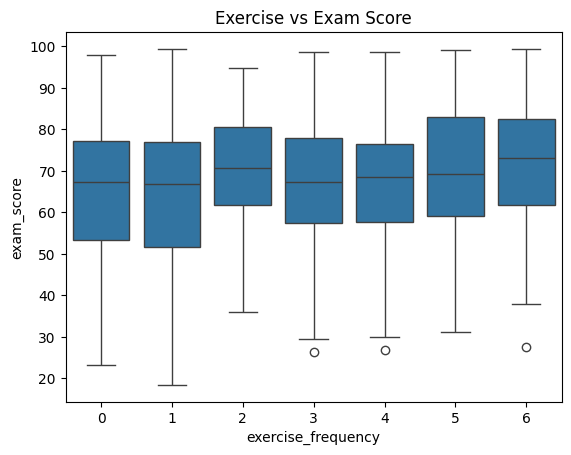

rho = 0.12, p = 0.00


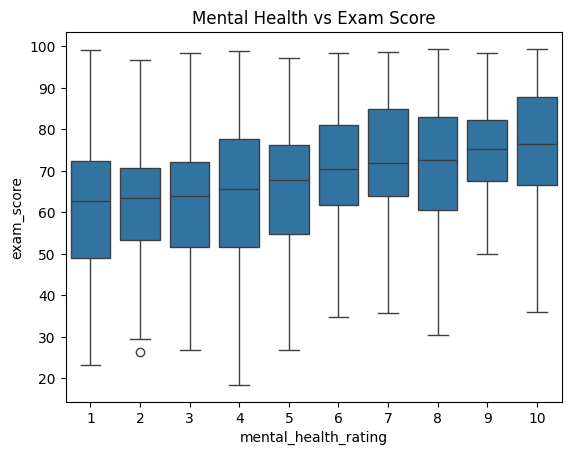

rho = 0.30, p = 0.00


In [300]:
sb.regplot(data=df_filtered, x="study_hours_per_day", y="exam_score")
plot.title("Study Hours vs Exam Score")
plot.show()
rho, p = spearmanr(df_filtered["study_hours_per_day"], df_filtered["exam_score"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

sb.regplot(data=df_filtered, x="attendance_percentage", y="exam_score")
plot.title("Attendance vs Exam Score")
plot.show()
rho, p = spearmanr(df_filtered["attendance_percentage"], df_filtered["exam_score"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

sb.regplot(data=df_filtered, x="sleep_hours", y="exam_score")
plot.title("Sleep vs Exam Score")
plot.show()
rho, p = spearmanr(df_filtered["sleep_hours"], df_filtered["exam_score"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

sb.boxplot(data=df_filtered, x="diet_quality", y="exam_score")
plot.title("Diet vs Exam Score")
plot.show()
rho, p = spearmanr(df_filtered["diet_quality"], df_filtered["exam_score"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

sb.boxplot(data=df_filtered, x="exercise_frequency", y="exam_score")
plot.title("Exercise vs Exam Score")
plot.show()
rho, p = spearmanr(df_filtered["exercise_frequency"], df_filtered["exam_score"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

sb.boxplot(data=df_filtered, x="mental_health_rating", y="exam_score")
plot.title("Mental Health vs Exam Score")
plot.show()
rho, p = spearmanr(df_filtered["mental_health_rating"], df_filtered["exam_score"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

## Correlation Between Independent Variables and Exam Score

Each independent variable is plotted against `exam_score` and tested using Spearman's rank correlation. Results:

- **Study Hours** has a very strong positive correlation (rho ≈ 0.78)
- **Mental Health Rating** shows a moderate positive correlation (rho ≈ 0.30)
- **Exercise, Sleep, Attendance** have weak but statistically significant positive correlations (rho ≈ 0.10)
- **Diet Quality** shows no significant direct correlation

This analysis confirms that study habits and mental well-being are key predictors of academic success.

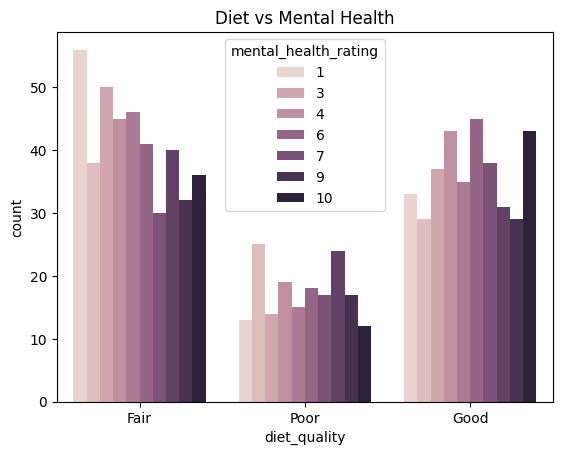

rho = 0.06, p = 0.05


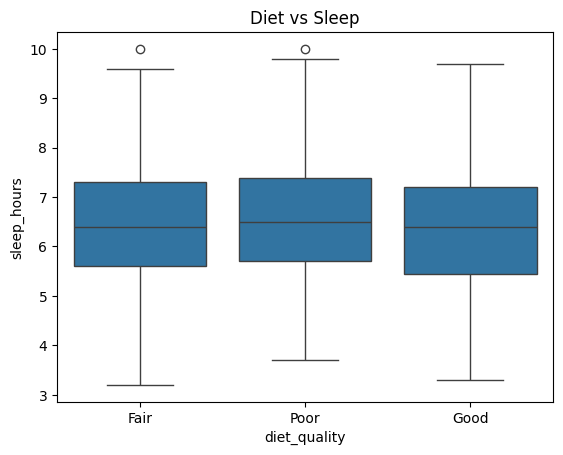

rho = 0.02, p = 0.57


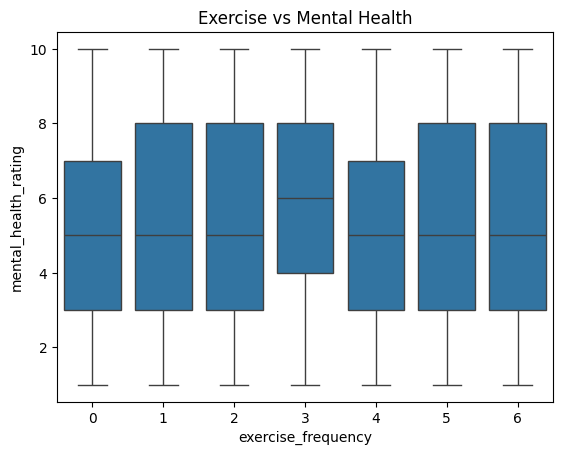

rho = -0.01, p = 0.68


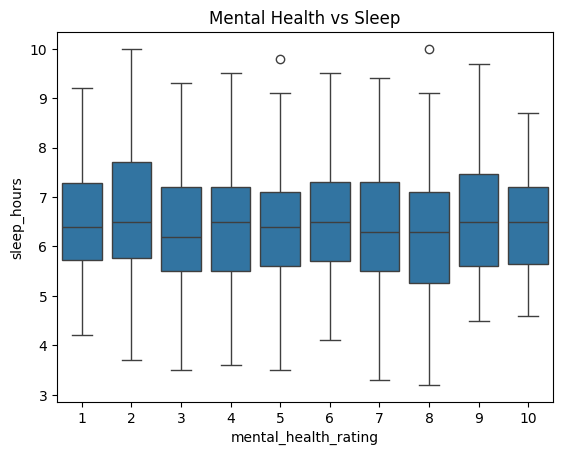

rho = -0.01, p = 0.65


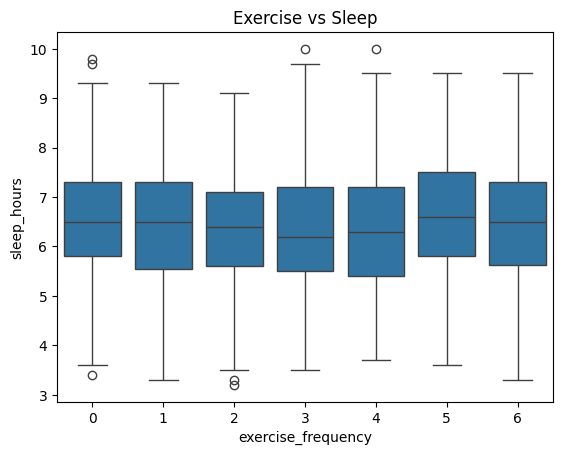

rho = 0.01, p = 0.77


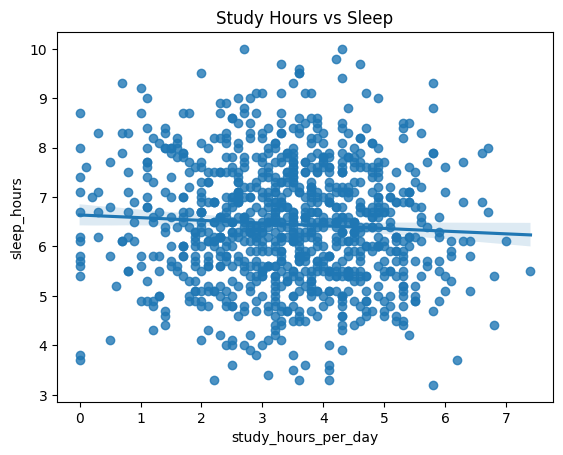

rho = -0.06, p = 0.07


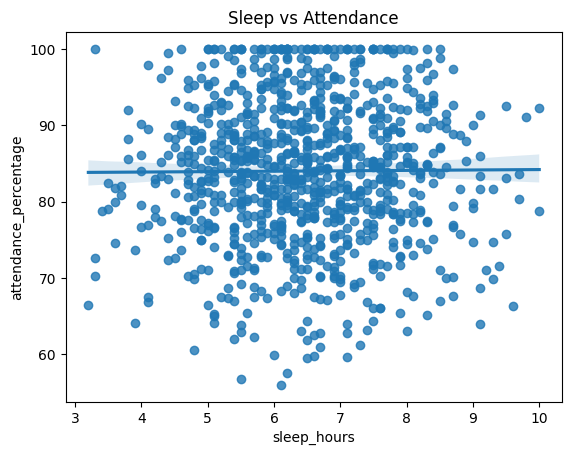

rho = 0.01, p = 0.85


In [301]:
# Diet vs Mental Health
sb.countplot(data=df_filtered, x="diet_quality", hue="mental_health_rating")
plot.title("Diet vs Mental Health")
plot.show()
rho, p = spearmanr(df_filtered["diet_quality"], df_filtered["mental_health_rating"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

# Diet vs Sleep
sb.boxplot(data=df_filtered, x="diet_quality", y="sleep_hours")
plot.title("Diet vs Sleep")
plot.show()
rho, p = spearmanr(df_filtered["diet_quality"], df_filtered["sleep_hours"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

# Exercise vs Mental Health
sb.boxplot(data=df_filtered, x="exercise_frequency", y="mental_health_rating")
plot.title("Exercise vs Mental Health")
plot.show()
rho, p = spearmanr(df_filtered["exercise_frequency"], df_filtered["mental_health_rating"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

# Mental Health vs Sleep
sb.boxplot(data=df_filtered, x="mental_health_rating", y="sleep_hours")
plot.title("Mental Health vs Sleep")
plot.show()
rho, p = spearmanr(df_filtered["mental_health_rating"], df_filtered["sleep_hours"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

# Exercise vs Sleep
sb.boxplot(data=df_filtered, x="exercise_frequency", y="sleep_hours")
plot.title("Exercise vs Sleep")
plot.show()
rho, p = spearmanr(df_filtered["exercise_frequency"], df_filtered["sleep_hours"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

# Study Hours vs Sleep
sb.regplot(data=df_filtered, x="study_hours_per_day", y="sleep_hours")
plot.title("Study Hours vs Sleep")
plot.show()
rho, p = spearmanr(df_filtered["study_hours_per_day"], df_filtered["sleep_hours"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

# Sleep vs Attendance
sb.regplot(data=df_filtered, x="sleep_hours", y="attendance_percentage")
plot.title("Sleep vs Attendance")
plot.show()
rho, p = spearmanr(df_filtered["sleep_hours"], df_filtered["attendance_percentage"])
print(f"rho = {rho:.2f}, p = {p:.2f}")

## Correlation Among Independent Variables

We explored whether the independent variables are related to each other. Most relationships are statistically insignificant or practically negligible. The only noteworthy finding:

- **Diet and Mental Health** show a very weak positive correlation (rho ≈ 0.06, p <= 0.05)

This supports the earlier assumption that diet may indirectly influence academic outcomes through its connection with mental health.

In [302]:
diet_map = {"Poor": 1, "Fair": 2, "Good": 3}
df_filtered["diet_quality_ordinal"] = df_filtered["diet_quality"].map(diet_map)

exam_data = df_filtered[["exam_score", "study_hours_per_day", "mental_health_rating", "attendance_percentage", "exercise_frequency", "sleep_hours", "diet_quality_ordinal"]].dropna()

exam_x = exam_data.drop("exam_score", axis=1)
exam_x = sm.add_constant(exam_x)
exam_y = exam_data["exam_score"]
exam_model = sm.OLS(exam_y, exam_x).fit()
HTML(sg([exam_model]).render_html())

## Multiple Regression Results

We fit a multiple linear regression model using all independent variables. The results provide a clearer picture of how each factor contributes to academic performance when considered together.

### Key Findings:

- **Study Hours per Day** remains the most impactful predictor by a large margin, consistent with earlier correlation results.
- **Sleep Hours**, **Mental Health Rating**, and **Exercise Frequency** each have moderate and statistically significant effects. This contrasts with their lower correlation values, suggesting they contribute **more meaningfully in combination** than they appear to individually.
- **Attendance Percentage**, although statistically significant, has a much smaller effect and remains the weakest predictor.
- **Diet Quality**, once again, has no statistically significant impact on exam scores in this multivariate context.

### Interpretation:

While the regression results broadly confirm our earlier insights — with study time as the dominant driver and diet having no direct effect — they also refine our understanding. Specifically, they reveal that **sleep, exercise, and mental health** have **more equal predictive value** than suggested by bivariate correlations. This highlights the importance of using multivariate models to capture the joint and unique contributions of interrelated factors.

The final model explains approximately **83% of the variance** in exam scores, providing strong overall explanatory power.